# Libraries

In [21]:
!pip install yfinance
import pandas as pd 
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import scipy.stats
import random
pd.options

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Steps 1-2

In [22]:
stst = list(pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx", header=4).dropna().Ticker)
br = list(pd.read_csv("https://www.blackrock.com/us/individual/products/239726/ishares-core-sp-500-etf/1464253357814.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund", header = 9).Ticker.dropna())

tickers = list(set(stst) & set(br))

In [23]:
data = yf.download(tickers, period='10y')[["Adj Close", "Volume"]]
data = data.dropna(how="all", axis=1)
close = data['Adj Close']
volume = data['Volume']
returns = data['Adj Close'].pct_change().resample("M").sum().shift(-1)

display(data)

[*********************100%***********************]  501 of 501 completed


Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2013-05-13   28.229780  16.705378   78.215614   14.100142   29.653927   
2013-05-14   28.839752  17.063618   79.246216   13.762783   30.193211   
2013-05-15   29.961344  17.732967   79.503876   13.297367   30.645952   
2013-05-16   29.508768  18.025217   78.602104   13.475036   30.765783   
2013-05-17   29.882627  17.921515   79.283051   13.434107   31.404936   
...                ...        ...         ...         ...         ...   
2023-05-08  132.449997  14.360000  125.750000  173.260345  147.449997   
2023-05-09  127.349998  14.470000  125.519997  171.532745  146.830002   
2023-05-10  128.059998  14.340000  125.800003  173.320267  146.419998   
2023-05-11  127.660004  14.070000  124.169998  173.510010  146.589996   
2023-05-12  127.489998  14.020000  122.860001  172.570007  147.149994   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2013-05-13   46.519897   30.031918  17.986668   66.749565   43.610001  ...   
2013-05-14   46.929768   30.610245  18.163334   67.275749   44.040001  ...   
2013-05-15   46.972458   31.114227  18.146667   67.451134   45.070000  ...   
2013-05-16   46.629593   30.428493  17.813334   67.325851   44.560001  ...   
2013-05-17   47.135311   30.230215  17.856667   68.687225   44.610001  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-08  167.728699  110.900002  76.139999  264.820007  344.059998  ...   
2023-05-09  167.768570  110.250000  76.610001  263.480011  342.649994  ...   
2023-05-10  169.014999  110.690002  77.220001  268.890015  344.019989  ...   
2023-05-11  171.440002  110.050003  77.309998  272.269989  341.579987  ...   
2023-05-12  170.990005  110.489998  76.900002  277.190002  335.450012  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2013-05-13  1252100  3107700   9810100  1034500  1150200  6619769  1150407   
2013-05-14   917300  3900000   9890300  1104200  1665300  3810088   982826   
2013-05-15  1328500  2794900  10399400   975900  1695900  4646636  1177805   
2013-05-16   957600  1862300  10469600  1452600   799000  3872266  1031236   
2013-05-17   983200  2437000  12721300   998700   502700  3929575  1469398   
...             ...      ...       ...      ...      ...      ...      ...   
2023-05-08  1836700  2171000  11187800   974400  1523300   981400  1304500   
2023-05-09  3359700  2102800  11370800  1670900  1452700  1094900  1017600   
2023-05-10  5041500  2963100  14884800  1027000  1344700  1595200  1163400   
2023-05-11  4509700  2850100  17165900   932600  1278700  1144100   899700   
2023-05-12  2653500  2295800  12608300   794000  1242700  1114700   840700   

                                       
              ZBRA      ZION      ZTS  
Date                                   
2013-05-13  177800   1729200   438700  
2013-05-14  214000   1470500   872300  
2013-05-15  237400   2333000   563200  
2013-05-16   87700   2042300  1278700  
2013-05-17  143100   1683800   962200  
...            ...       ...      ...  
2023-05-08  384100  12038700  1976100  
2023-05-09  432900   4999300  1904200  
2023-05-10  257400   5689100  1610500  
2023-05-11  349400   7247700  1539100  
2023-05-12  221500   6214400  1267700  

[2519 rows x 1002 columns]

# Steps 3-5

In [86]:
class tool():
  def __init__(self, stock_data, tickers):
    self.price = close
    self.volume = volume
    self.returns = returns
    self.tickers = tickers

    self.mom_fact_df = pd.DataFrame(index = self.tickers)
  
  def fiftytwo_trend(self):
    self.fifty_two_trend_df = pd.DataFrame(index=self.tickers)

    for i in range(1, 21):
          self.fifty_two_trend_df[i] = np.polyfit(range(len(self.price[-i - 252 : -i])), self.price[-i -252 : -i], 1)[0]
    return self.fifty_two_trend_df.mean(axis=1)


  def factors(self):
        self.rmin = self.price.rolling(252).min()
        self.mom_fact_df["% abv_252_day_low"] = ((self.price - self.rmin) / self.rmin)[-20:].mean()

        self.mom_fact_df["4/52_price_oscillator"] = ((self.price.rolling(20).mean() - self.price.rolling(260).mean())
          /self.price.rolling(260).std())[-20:].mean()

        self.mom_fact_df["39_wk_return"] = self.price.pct_change(189)[-20:].mean()
        
        self.mom_fact_df["pricevol"] = (
            (self.returns * self.volume).rolling(252).sum()[-20:].mean())
        
        self.mom_fact_df["52_wk_trend_line"] = self.fiftytwo_trend()

        return self.mom_fact_df


  def aggzs(self):
      self.mom_fact_df = self.factors()
      self.scored = ((self.mom_fact_df - self.mom_fact_df.mean()) / self.mom_fact_df.std()).sum(axis=1)
      return self.scored


  def baskets(self):
      self.z_scored = self.aggzs()
      return self.z_scored.nlargest(10).index, self.z_scored.nsmallest(10).index

# Step 6

In [87]:
timespan = pd.DataFrame(pd.date_range("2018-05-10", dt.datetime.today(), freq="M"))
timespan.rename(columns={0: "date"}, inplace=True)
long_returns, short_returns = pd.DataFrame(), pd.DataFrame()


for date in timespan.date:
  MF = tool(data[data.index <= date], tickers)
  longs, short = MF.baskets()
  
  long_returns = long_returns.append(returns[longs].loc[date])
  short_returns = short_returns.append(returns[short].loc[date])

<ipython-input-87-0bd0c05df9f6>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  long_returns = long_returns.append(returns[longs].loc[date])
<ipython-input-87-0bd0c05df9f6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  short_returns = short_returns.append(returns[short].loc[date])
<ipython-input-87-0bd0c05df9f6>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  long_returns = long_returns.append(returns[longs].loc[date])
<ipython-input-87-0bd0c05df9f6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  short_returns = short_returns.append(returns[short].loc[date])
<ipython-input-87-0bd0c05df9f6>:10: FutureWarning: The frame.append 

In [88]:
long_returns.iloc[-1].dropna()

MCHP    0.012445
FSLR    0.269681
AXON   -0.029311
RCL     0.143122
NVDA    0.023654
GE     -0.000973
WYNN   -0.078824
META   -0.026995
LVS    -0.058833
COO     0.022896
Name: 2023-04-30 00:00:00, dtype: float64

# Step 7

In [89]:
rets_sum = pd.DataFrame(long_returns.mean(axis=1) - short_returns.mean(axis=1)).shift()
rets_sum = rets_sum[-60:]

rets_sum["cum_ret"] = np.exp(np.log1p(rets_sum).cumsum())

rets_sum["SPY"] = (
    yf.download("SPY", period="10y")["Adj Close"].pct_change().resample("M").sum()
)

[*********************100%***********************]  1 of 1 completed


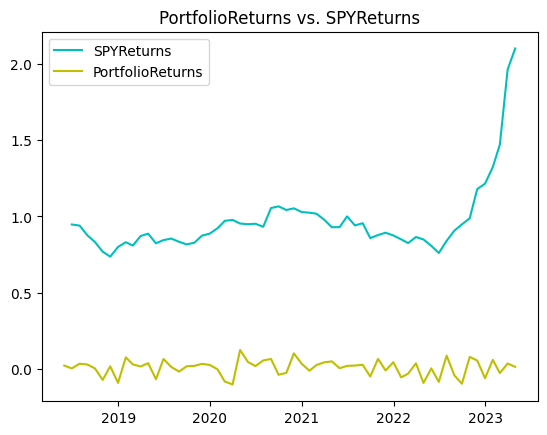

In [102]:
plt.plot(rets_sum["cum_ret"],
         label="SPYReturns",
        color="c")

plt.plot(rets_sum["SPY"],
         label="PortfolioReturns",
        color="y")

plt.legend()
plt.title('PortfolioReturns vs. SPYReturns');
     

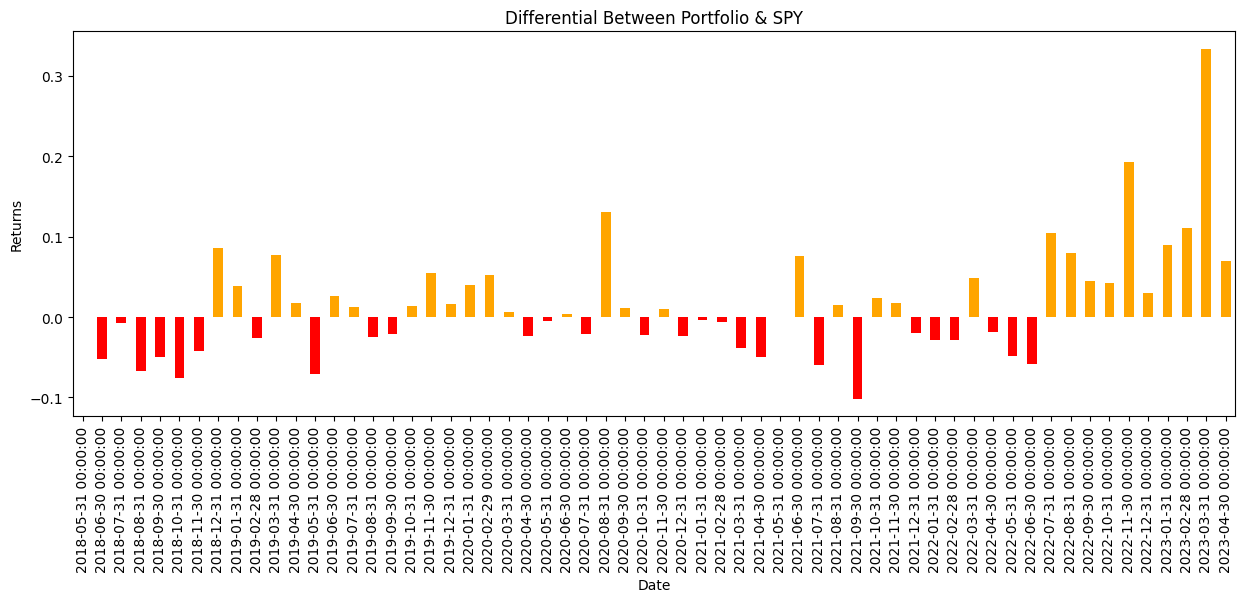

In [101]:
rets_sum['colors'] = (rets_sum[0] > 0)   
                                                
rets_sum[0].plot(kind='bar'
                   , figsize=(15,5)
                   , title='Differential Between Portfolio & SPY'
                   , xlabel='Date'
                   , ylabel='Returns'
                   , color=['orange' if i == True else 'red' for i in rets_sum['colors']]);

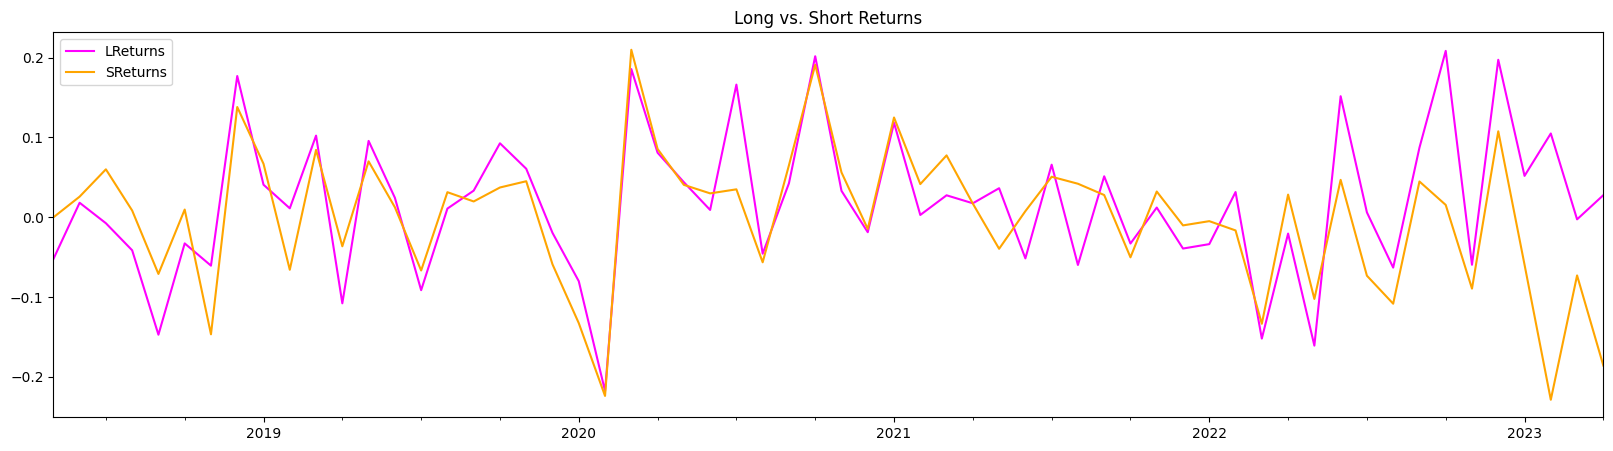

In [100]:
fig = plt.subplots(figsize=(20,5))
plt.title('Long vs. Short Returns');
long_returns.mean(axis=1).plot(
    color="magenta",
    label="LReturns"
)
short_returns.mean(axis=1).plot(
    color="orange",
    label="SReturns"
)
plt.legend()
plt.show()

# CREDIT & SOURCES

Professor John Droescher - lectures & code

https://finance.yahoo.com/quote/SPY

https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1652552246&period2=1684088246&interval=1d&events=history&includeAdjustedClose=true

https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy

https://www.ssga.com/us/en/intermediary/etfs/library-content/products/factsheets/etfs/us/factsheet-us-en-spy.pdf

https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx

https://www.blackrock.com/us/financial-professionals/products/239726/ishares-core-sp-500-etf

https://www.blackrock.com/us/financial-professionals/literature/fact-sheet/ivv-ishares-core-s-p-500-etf-fund-fact-sheet-en-us.pdf

https://www.blackrock.com/us/financial-professionals/products/239726/ishares-core-sp-500-etf/1527781476618.ajax?fileType=xls&fileName=iShares-Core-SP-500-ETF_fund&dataType=fund

https://www.blackrock.com/us/financial-professionals/products/239726/ishares-core-sp-500-etf/1500962885783.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund

https://www.plus2net.com/python/colab.php

https://stackoverflow.com/questions/69448584/attributeerror-when-adding-an-item-to-a-basket

https://notebook.community/quantopian/research_public/notebooks/lectures/Factor_Analysis/notebook

https://quantpedia.com/strategies/value-and-momentum-factors-across-asset-classes/

https://www.composer.trade/learn/momentum-trading-algorithm-in-python

https://towardsdatascience.com/python-for-finance-stock-portfolio-analyses-6da4c3e61054

https://quant.stackexchange.com/questions/27466/backtesting-long-short-market-neutral-z-score-strategy-with-custom-factors-and-c

https://www.quantrocket.com/codeload/quant-finance-lectures/quant_finance_lectures/Lecture32-Fundamental-Factor-Models.ipynb.html